In [36]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [37]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [38]:
data = []
paths = []
result = []
for r, d, f in os.walk(r'/content/brain-mri-images-for-brain-tumor-detection'):
    for file in f:
        if ('.jpg' in file) or ('.jpeg' in file) or '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [39]:
paths = []
for r, d, f in os.walk(r'/content/brain-mri-images-for-brain-tumor-detection'):
  for file in f:
        if ('.jpg' in file) or ('.jpeg' in file) or '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [40]:
data = np.array(data)
data.shape

(286, 128, 128, 3)

In [41]:
result = np.array(result)
result = result.reshape(286,2)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

In [44]:
y_train.shape

(228, 2)

In [45]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
6/6 [==============================] - 15s 2s/step - loss: 35.6488 - val_loss: 25.0942
Epoch 2/30
6/6 [==============================] - 13s 2s/step - loss: 12.7513 - val_loss: 11.4426
Epoch 3/30
6/6 [==============================] - 14s 2s/step - loss: 10.2727 - val_loss: 6.8603
Epoch 4/30
6/6 [==============================] - 14s 2s/step - loss: 8.9592 - val_loss: 8.9143
Epoch 5/30
6/6 [==============================] - 14s 2s/step - loss: 5.0505 - val_loss: 7.6746
Epoch 6/30
6/6 [==============================] - 14s 2s/step - loss: 4.1323 - val_loss: 5.2969
Epoch 7/30
6/6 [==============================] - 13s 2s/step - loss: 2.5327 - val_loss: 4.5780
Epoch 8/30
6/6 [==============================] - 13s 2s/step - loss: 1.7470 - val_loss: 3.2107
Epoch 9/30
6/6 [==============================] - 13s 2s/step - loss: 1.5827 - val_loss: 2.7885
Epoch 10/30
6/6 [==============================] - 13s 2s/step - loss: 1.3744 - val_loss: 2.5040
Epoch 11/30
6/6 [=================

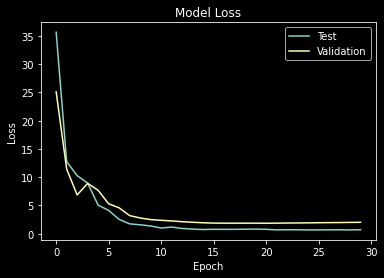

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [49]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

54.936397075653076% Confidence This Is Its a Tumor


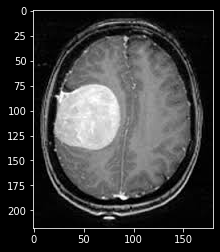

In [51]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))